In [14]:
import copy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import skimage.io as io
import scipy.ndimage as ndi

In [15]:
background = io.imread("0027_thresh_cropped.jpg")
ct_img = io.imread("OL_ctFIRE_0027_cropped.tif")

print np.shape(background)
print np.shape(ct_img)

(800, 800, 3)
(800, 800, 3)


In [16]:
scale_size = int(3.145 * 50)
x_end = 750

bg_scalebar = copy.deepcopy(background)
bg_scalebar[700-5:720+5,(x_end-scale_size)-5:x_end+5,:] = 0
bg_scalebar[700:720,(x_end-scale_size):x_end,:] = np.max(bg_scalebar)

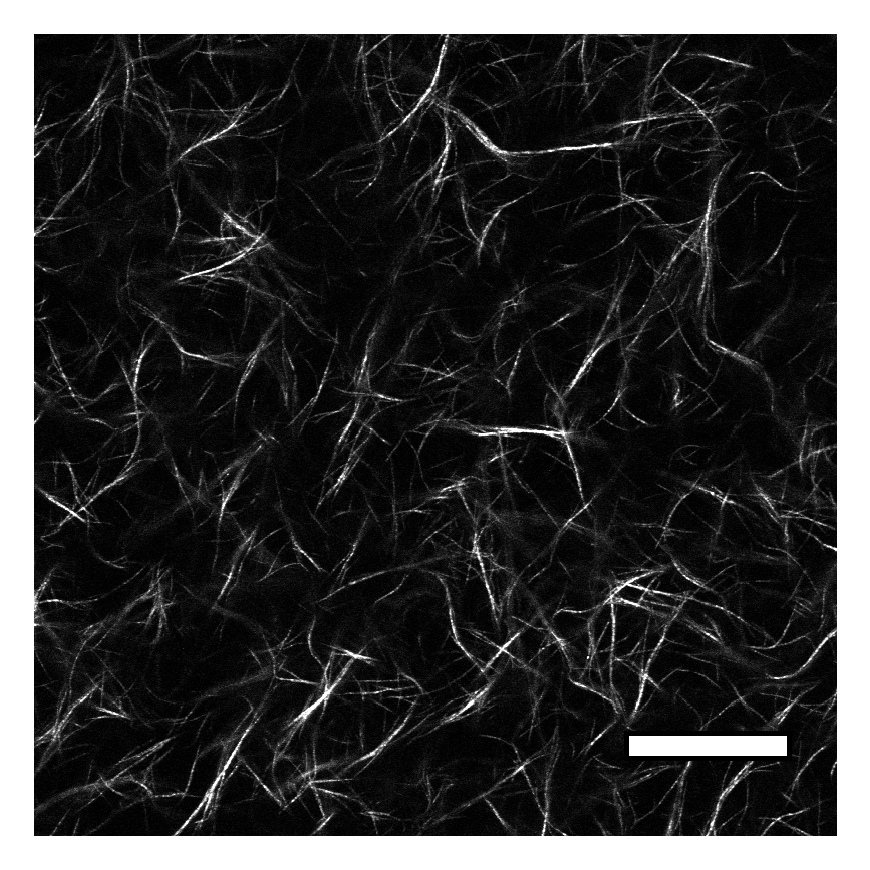

In [17]:
plt.figure(figsize=(3,3), dpi=300)

plt.axis("off")

fig = plt.imshow(bg_scalebar)

fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.tight_layout()

plt.savefig("OL_ctFIRE_0027_cropped_ROI.tif", bbox_inches='tight', pad_inches=0)

In [18]:
ct_img = ct_img[:,30:770,:]
print np.shape(ct_img)

(800, 740, 3)


In [19]:
im = Image.fromarray(ct_img)
im_resized = im.resize((800, 800), Image.ANTIALIAS)

([], <a list of 0 Text yticklabel objects>)

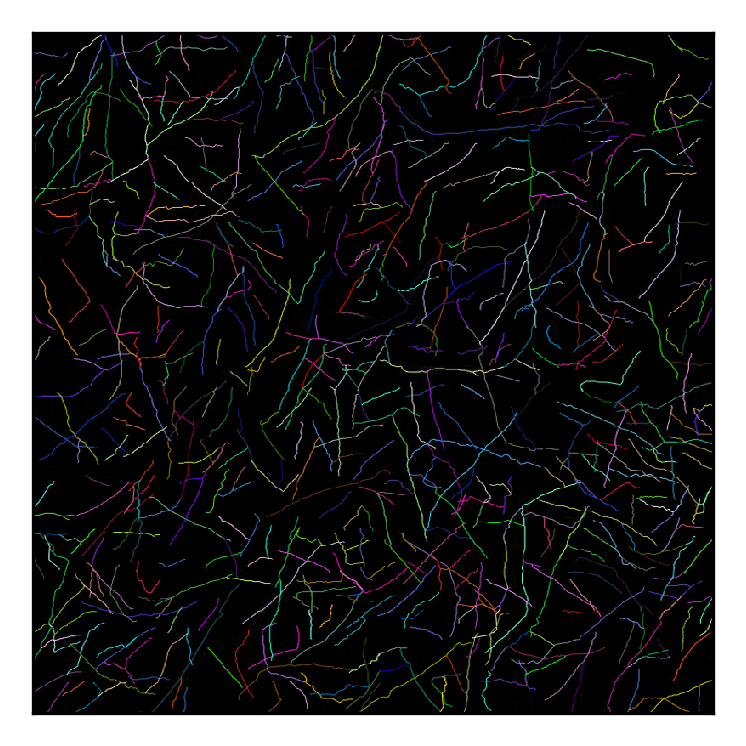

In [20]:
plt.figure(figsize=(3,3), dpi=300)
plt.imshow(im_resized)
plt.xticks([])
plt.yticks([])

In [21]:
cropped_img = np.array(im_resized)
print np.shape(cropped_img)

(800, 800, 3)


In [22]:
bin_img = cropped_img[:,:,0] > 10
bin_img = bin_img | (cropped_img[:,:,1] > 10)
bin_img = bin_img | (cropped_img[:,:,2] > 10)

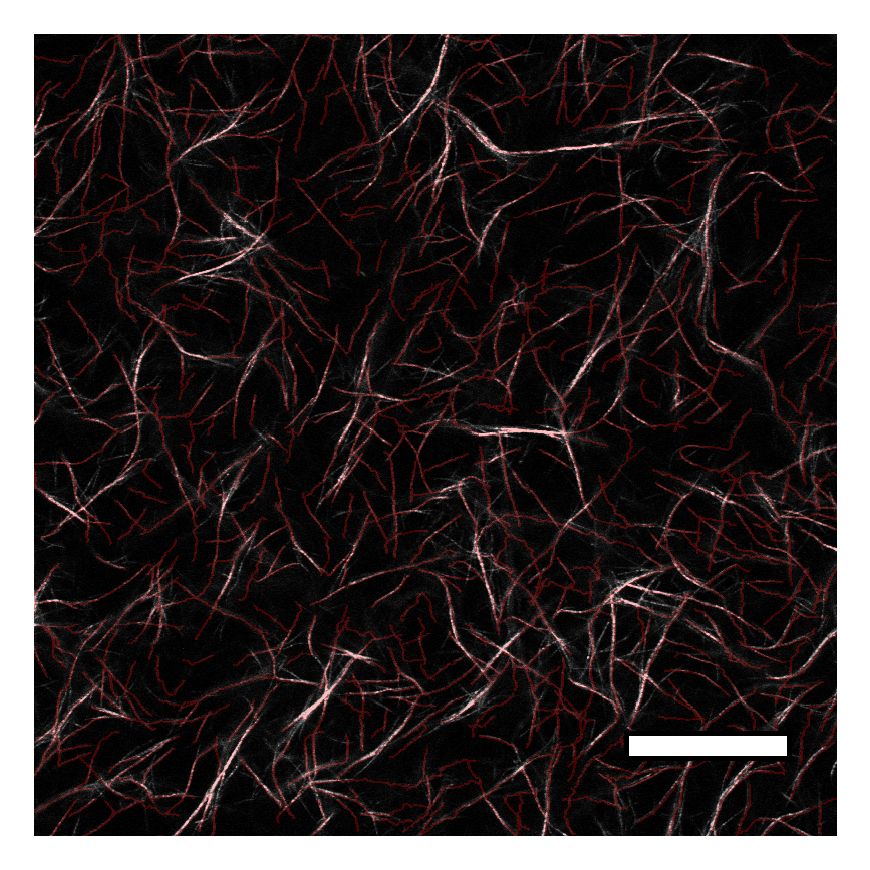

In [23]:
overlay_img = np.zeros((800,800,3))
overlay_img[bin_img, 0] = 255

ov = Image.fromarray(overlay_img.astype('uint8'), 'RGB')
bg = Image.fromarray(background)
blended = Image.blend(bg, ov, 0.25)

annotated_ROI = np.array(blended)
annotated_ROI[700-5:720+5,(x_end-scale_size)-5:x_end+5,:] = 0
annotated_ROI[700:720,(x_end-scale_size):x_end,:] = 255

plt.figure(figsize=(3,3), dpi=300)
plt.axis("off")
fig = plt.imshow(annotated_ROI)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("OL_ctFIRE_0027_cropped_overlay.tif", bbox_inches = 'tight', pad_inches = 0)

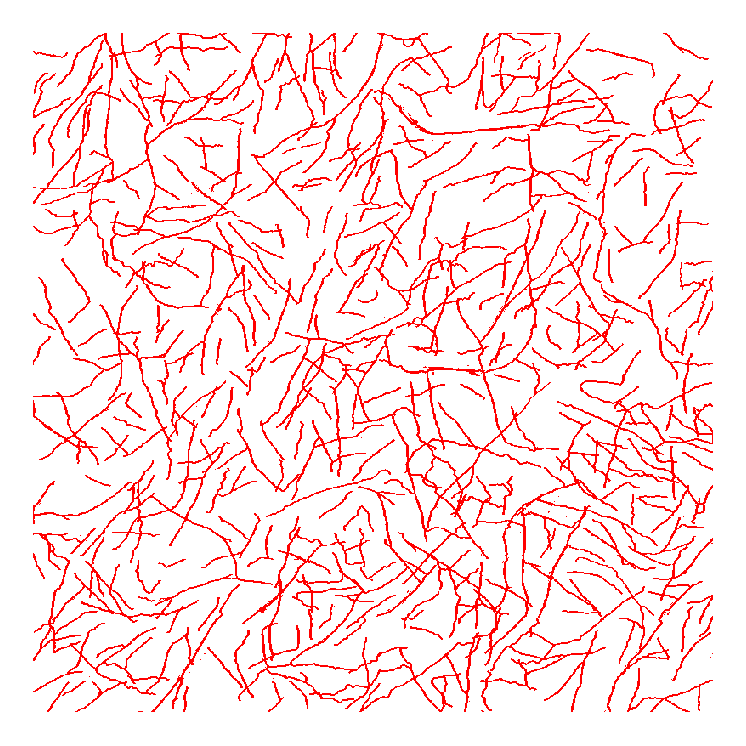

In [24]:
overlay_img = np.zeros((800,800,3))
overlay_img[bin_img, 0] = 1

fibers = Image.new('RGBA', (800, 800), (255, 0, 0, 0))
f_data = fibers.load()

for i in range(fibers.size[0]):        
    for j in range(fibers.size[1]):    
        f_data[i,j] = (bin_img[j,i]*255, 0, 0, bin_img[j,i]*255)     

        
res = np.array(fibers)

plt.figure(figsize=(3,3), dpi=300)
plt.axis("off")
fig = plt.imshow(res)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("OL_ctFIRE_0027_cropped_overlay_mask.tif", bbox_inches='tight', pad_inches=0, transparent=True)

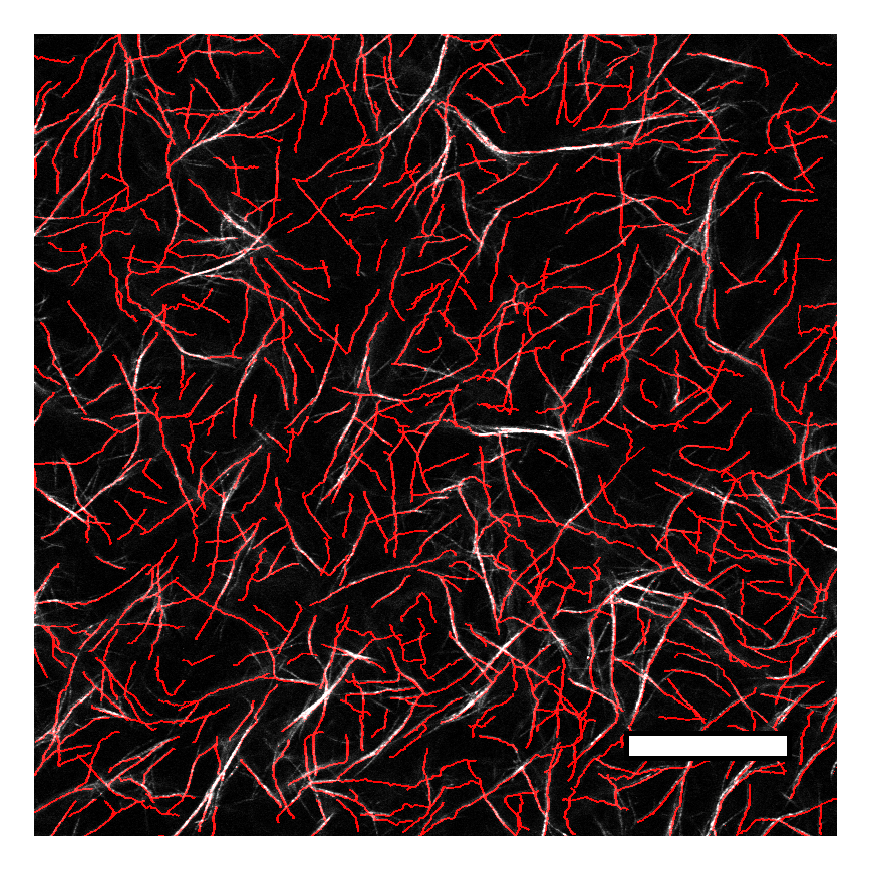

In [25]:
overlay_img = np.zeros((800,800,3))

overlay_img = copy.deepcopy(background) 

overlay_img[bin_img, 0] = 255

annotated_ROI = np.array(overlay_img)
annotated_ROI[700-5:720+5,(x_end-scale_size)-5:x_end+5,:] = 0
annotated_ROI[700:720,(x_end-scale_size):x_end,:] = 255

plt.figure(figsize=(3,3), dpi=300)
plt.axis("off")
fig = plt.imshow(annotated_ROI)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("OL_ctFIRE_0027_cropped_overlay_opaque.tif", bbox_inches = 'tight', pad_inches = 0)

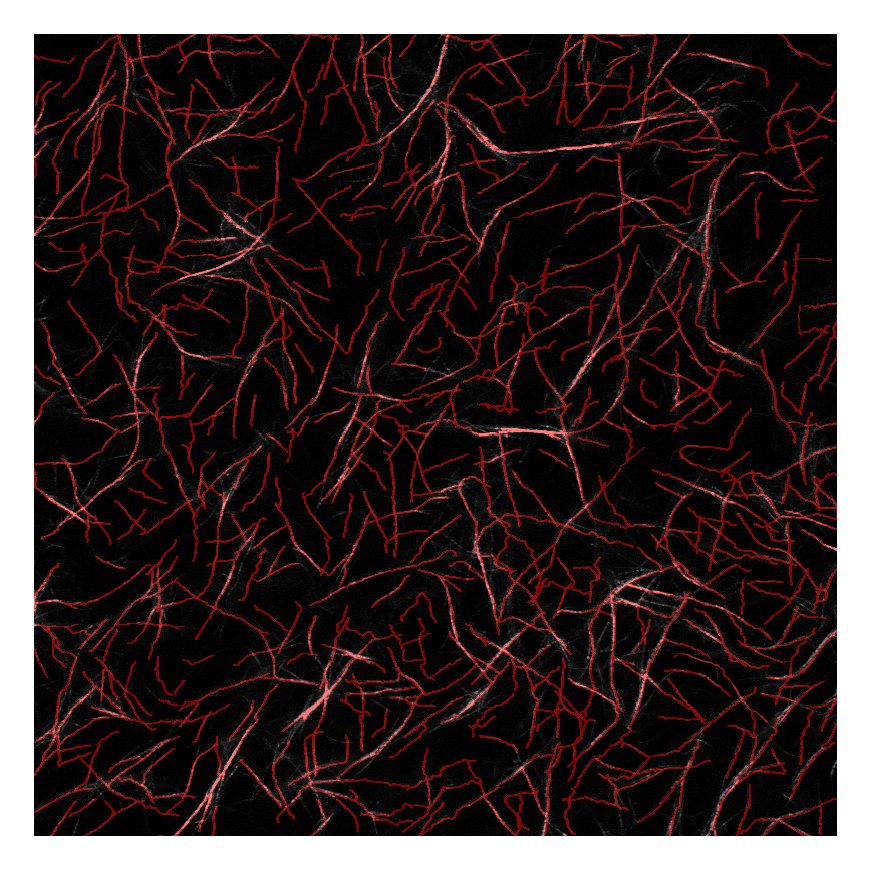

In [26]:
ova = ov.convert('RGBA')
ova.putalpha(128)

bg = Image.fromarray(background)
bga = bg.convert('RGBA')

overlay_transparent = np.array(Image.alpha_composite(bga, ova))

plt.figure(figsize=(3,3), dpi=300)
plt.axis("off")
fig = plt.imshow(overlay_transparent)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig("OL_ctFIRE_0027_cropped_overlay_semitransparent.tif", bbox_inches = 'tight', pad_inches = 0)